# Predicting houses prices using kaggle dataset

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the dataset csv file as a dataframe
path="Housing.csv"
df=pd.read_csv(path)

In [23]:
#Printing first 5 rows of dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [25]:
df.isnull().sum()
#No missing values found

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# EDA on Discrete data

In [26]:
categorical_features= df.drop(columns=['price','area'])
numerical_features = df[['price','area']]
categorical_features



,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4,4,4,yes,no,no,no,yes,3,no,furnished
2,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,3,1,1,no,no,no,no,no,0,no,furnished


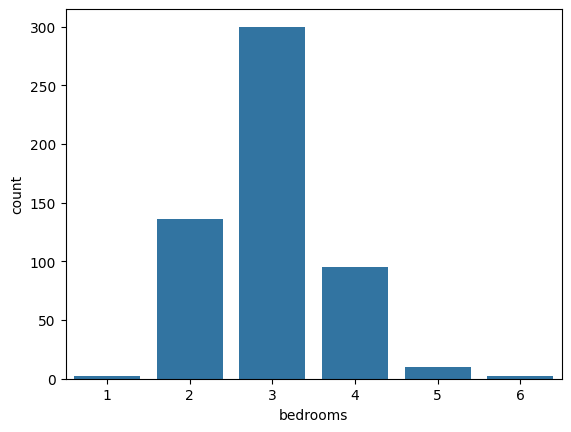

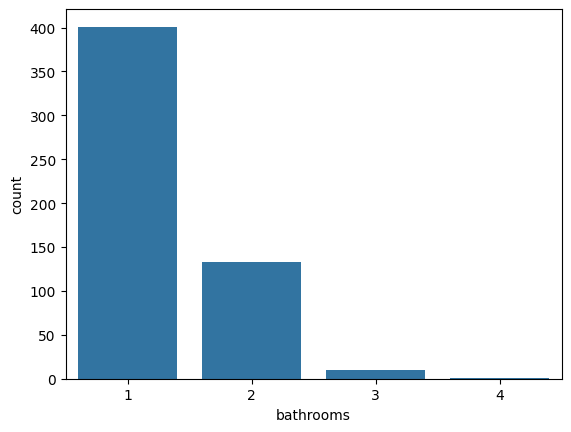

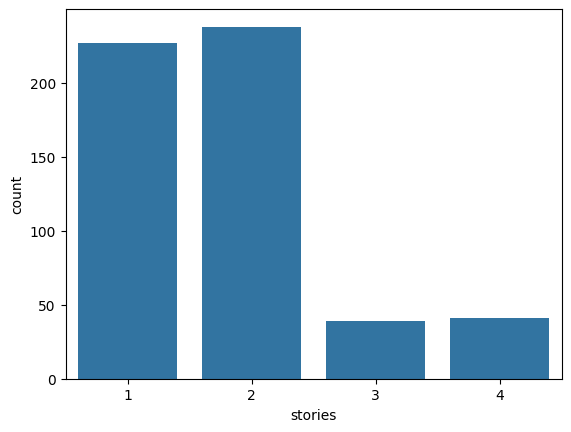

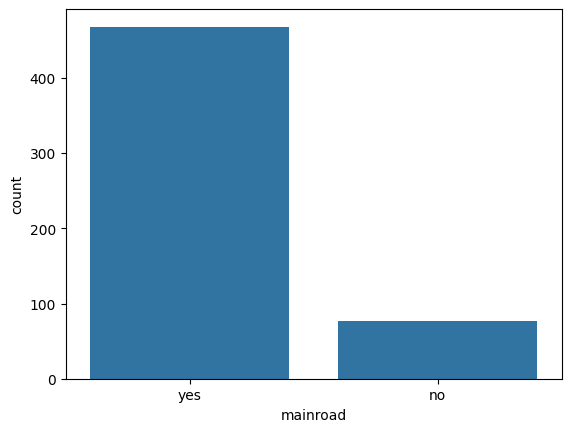

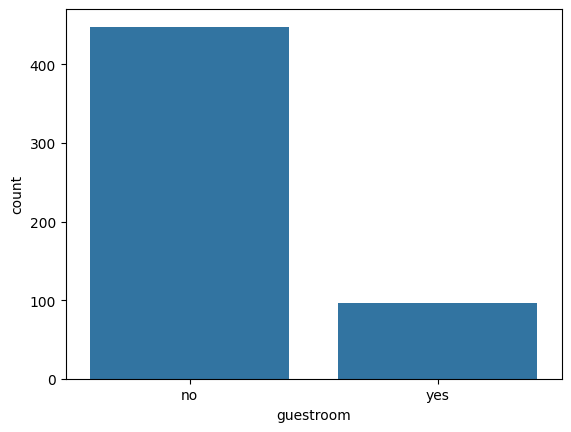

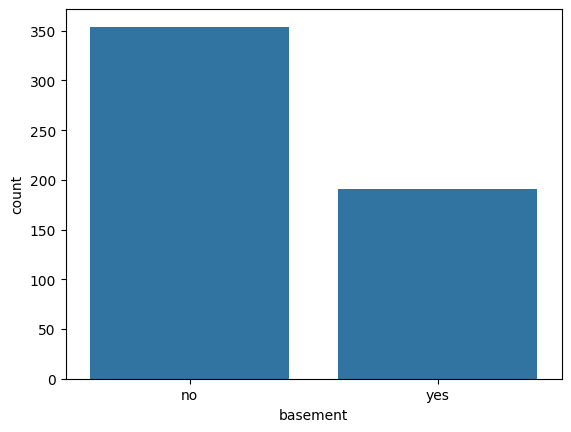

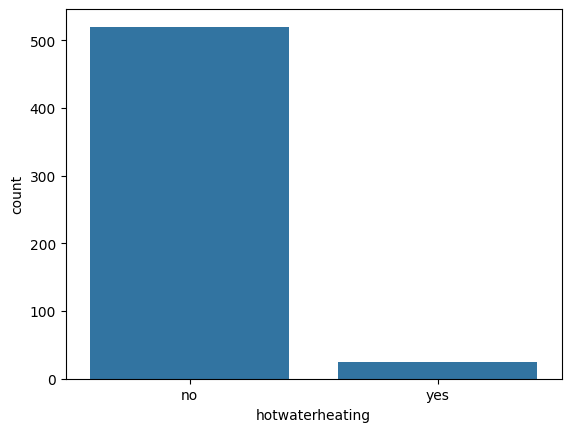

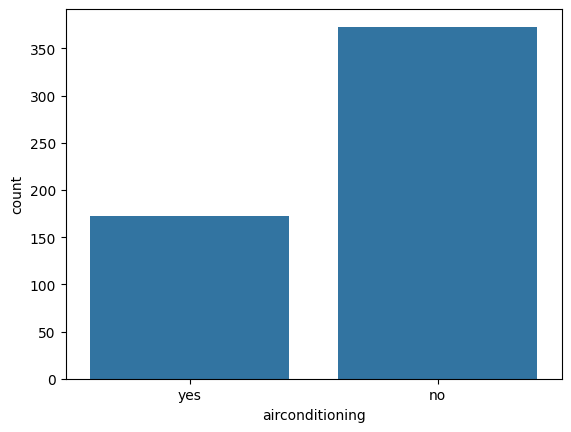

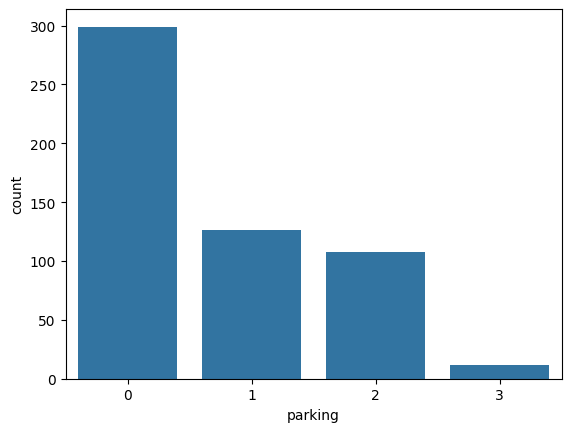

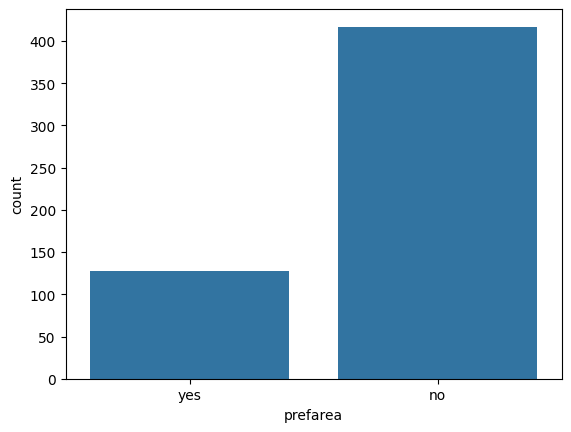

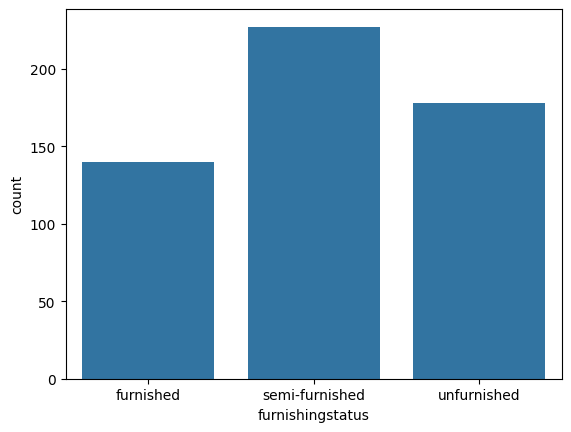

In [27]:
for col in categorical_features:
    data=df.copy()
    plt.figure()
    sns.countplot(data,x=col)
    
   


Insights:
    The count plot display a non uniformity in data.
    


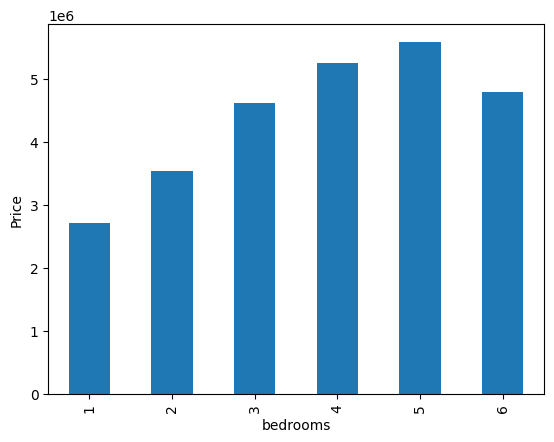

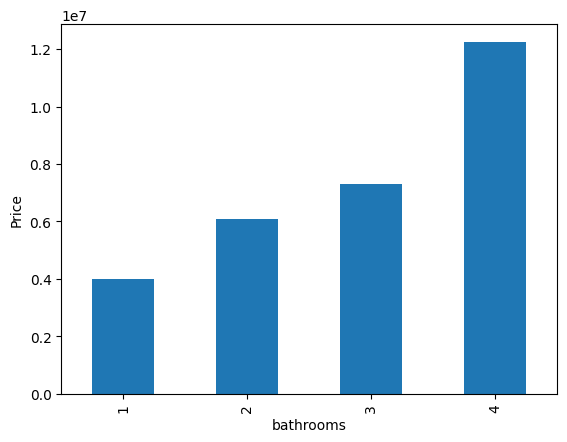

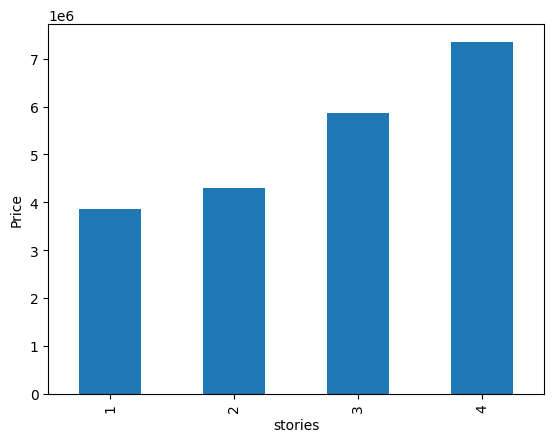

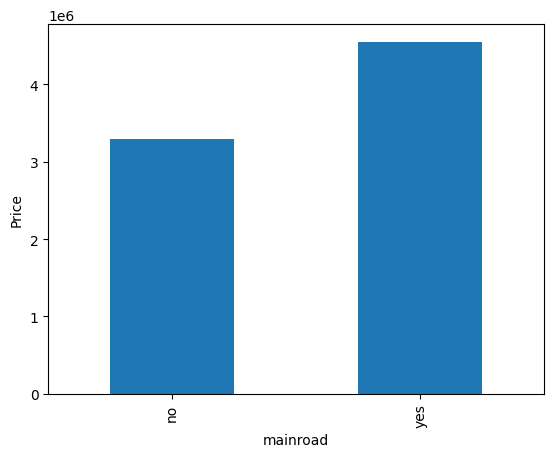

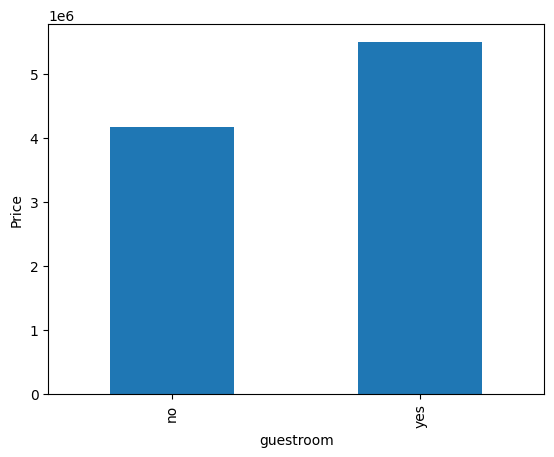

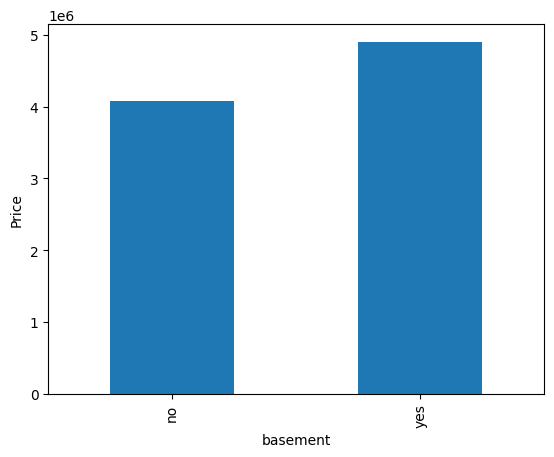

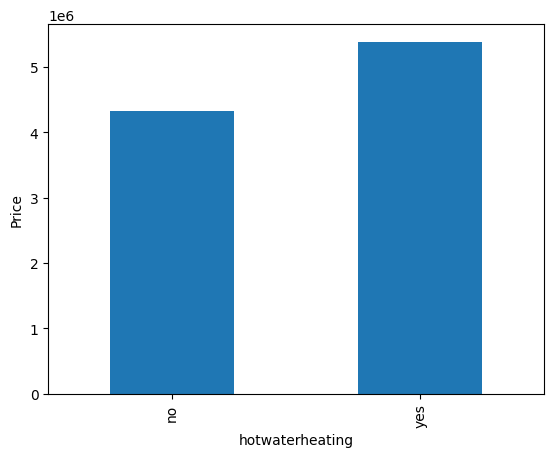

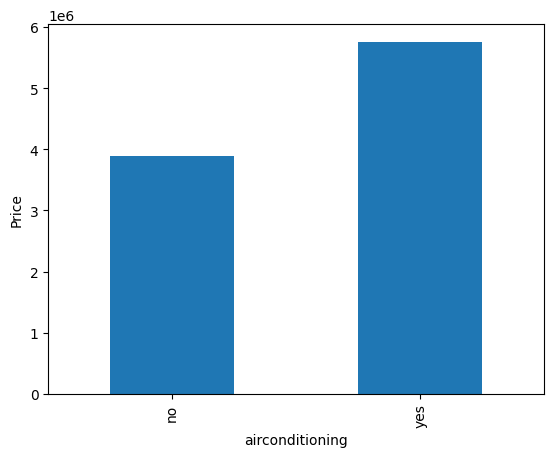

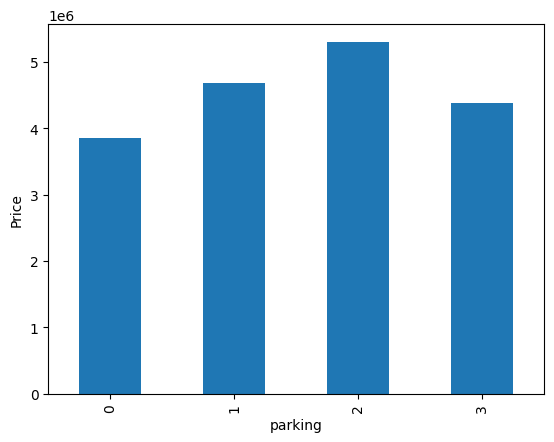

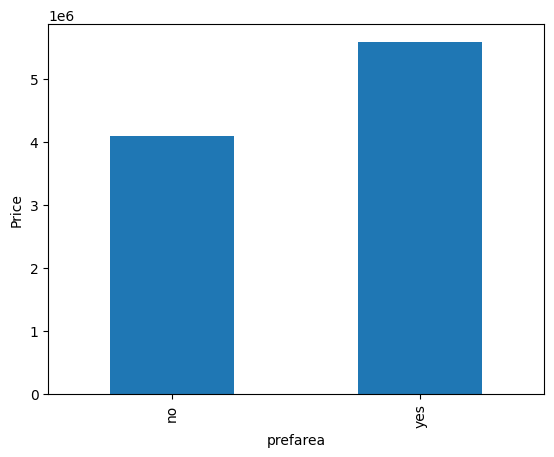

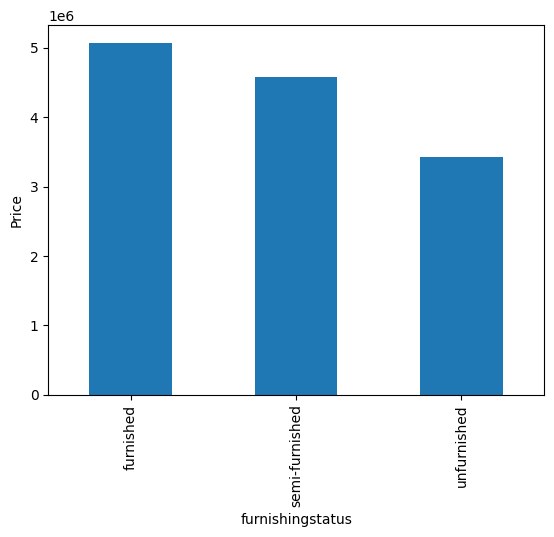

In [28]:
for col in categorical_features:
    data=df.copy()
    data.groupby(col)['price'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()


# EDA on Continous Numerical Data

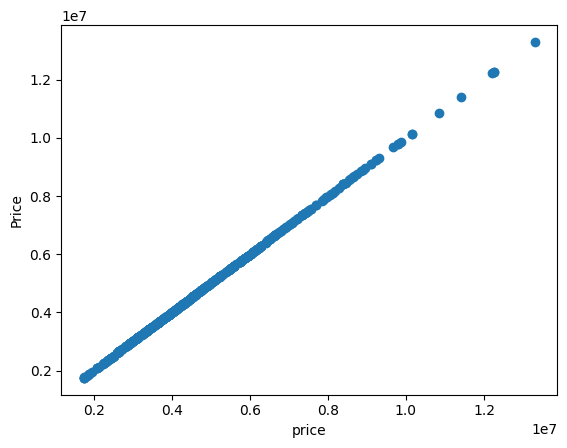

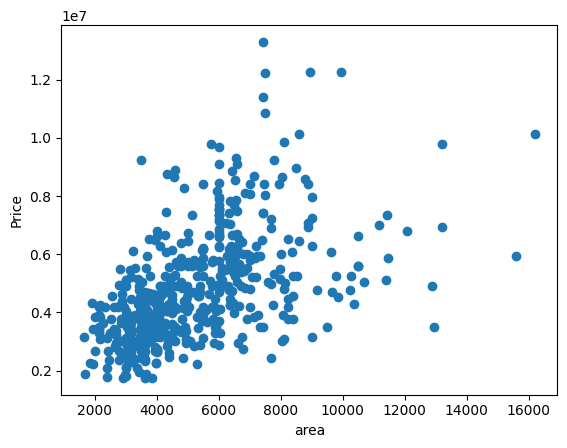

In [29]:
for col in numerical_features:
    plt.scatter(df[col],df['price'])
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

## Feature Engineering


In [30]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode with yes no data
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [31]:

from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])

# Apply OrdinalEncoder to the 'furnishingstatus' column
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])


In [32]:
    # Create new features (e.g., price per area, total number of rooms)
df['price_per_area'] = df['price'] / df['area']


df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_area,total_rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2.0,1792.452830,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2.0,1367.187500,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0,1229.919679,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2.0,1628.666667,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2.0,1537.735849,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0.0,606.666667,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1.0,736.312500,4
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0.0,483.425414,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2.0,601.374570,4


In [33]:

print(f'dataset shape: {df.shape}')

dataset shape: (545, 15)


In [34]:
df['furnishingstatus']=df['furnishingstatus'].astype(int)

In [35]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_area,total_rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,1792.452830,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,1367.187500,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1229.919679,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,1628.666667,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,1537.735849,5


<Axes: >

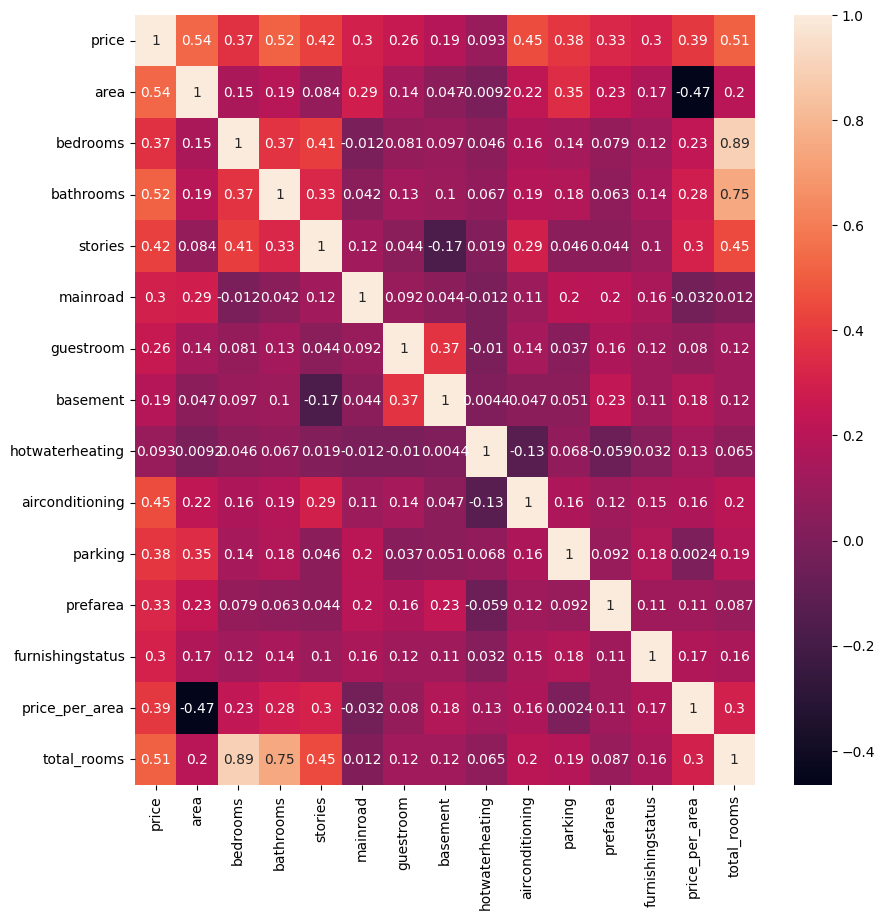

In [36]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df['area'] = scaler.fit_transform(df[['area']])  # Ensure 'area' is in double brackets to keep it 2D

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_area,total_rooms
0,13300000,1.046726,4,2,3,1,0,0,0,1,2,1,2,1792.452830,6
1,12250000,1.757010,4,4,4,1,0,0,0,1,3,0,2,1367.187500,8
2,12250000,2.218232,3,2,2,1,0,1,0,0,2,1,1,1229.919679,5
3,12215000,1.083624,4,2,2,1,0,1,0,1,3,1,2,1628.666667,6
4,11410000,1.046726,4,1,2,1,1,1,0,1,2,0,2,1537.735849,5


In [38]:
#Give statistical information about numerical features in the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_area,total_rooms
count,5.450000e+02,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,-1.564498e-16,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275,993.326978,4.251376
std,1.870440e+06,1.000919e+00,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373,346.537025,1.036611
min,1.750000e+06,-1.614530e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270.395550,2.000000
25%,3.430000e+06,-7.151451e-01,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,745.370370,4.000000
50%,4.340000e+06,-2.539222e-01,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,952.380952,4.000000
75%,5.740000e+06,5.578300e-01,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1184.615385,5.000000
max,1.330000e+07,5.096263e+00,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2640.000000,8.000000


In [39]:
#Seperating input features and target feature
X=df.drop(labels=['price'],axis=1)
y=df[['price']]



## Model Training and Evaluation


In [40]:
from sklearn.model_selection import train_test_split
#splitting the data in to training and test data
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

#Printing the shape of the test and train data
print("Training data shape",x_train.shape,y_train.shape)
print("Testing data shape", x_test.shape,y_test.shape)
print(y_train)

Training data shape (436, 14) (436, 1)
Testing data shape (109, 14) (109, 1)
       price
46   7525000
93   6300000
335  3920000
412  3430000
471  3010000
..       ...
71   6755000
106  6160000
270  4340000
435  3290000
102  6195000

[436 rows x 1 columns]


In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define models to train
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor (SVR)": SVR(kernel='rbf')
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Make predictions
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

# Print results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:f}")
    print()


Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Random Forest...
Training Gradient Boosting...


c:\Users\Sohai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+14, tolerance: 1.344e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sohai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Sohai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still requir

Training Support Vector Regressor (SVR)...

Model Performance:
Linear Regression:
  MAE: 503245.297410
  MSE: 586676606817.308472
  RMSE: 765948.175021
  R2: 0.883931

Ridge Regression:
  MAE: 504176.254011
  MSE: 588973878850.616211
  RMSE: 767446.336137
  R2: 0.883477

Lasso Regression:
  MAE: 503245.300600
  MSE: 586676641644.423706
  RMSE: 765948.197755
  R2: 0.883931

Random Forest:
  MAE: 286002.249541
  MSE: 335050374925.725647
  RMSE: 578835.360811
  R2: 0.933713

Gradient Boosting:
  MAE: 273893.848737
  MSE: 193690194840.528992
  RMSE: 440102.482202
  R2: 0.961680

Support Vector Regressor (SVR):
  MAE: 1763898.133312
  MSE: 5567971557062.758789
  RMSE: 2359654.965681
  R2: -0.101572



c:\Users\Sohai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


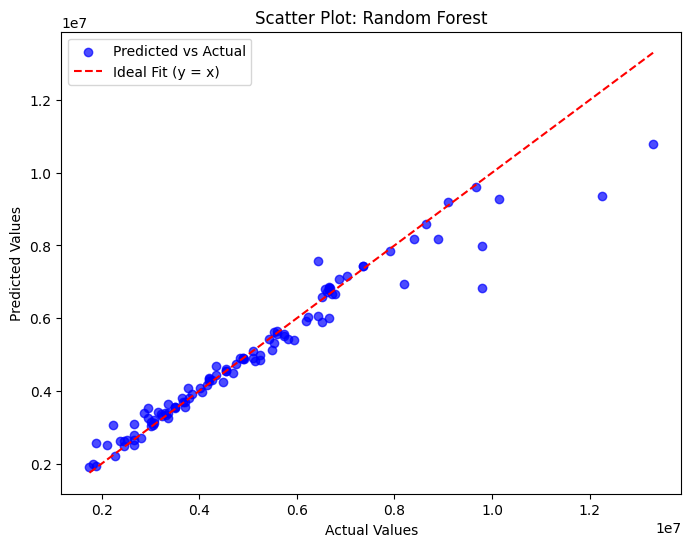

In [42]:
# Scatter plot of actual vs. predicted values for a specific model
import matplotlib.pyplot as plt

# Choose the model for visualization (e.g., "Random Forest")
model_name = "Random Forest"
selected_model = models[model_name]

# Predict using the selected model
y_pred = selected_model.predict(x_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit (y = x)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Scatter Plot: {model_name}")
plt.legend()
plt.show()
